In [1]:
#Установка ludwig
#!pip install ludwig==0.4.1

In [2]:
# Установка transformers
!pip install transformers

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [3]:
#Установка catboost
!pip install catboost

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [4]:
import pandas as pd
from itertools import groupby

In [5]:
#import необходимых модулей

import pandas as pd
#from ludwig.api import LudwigModel
#from ludwig.visualize import learning_curves
import yaml
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, f1_score

import numpy as np
from datetime import datetime, timedelta

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
#графики в svg выглядят более четкими
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from catboost import CatBoostRegressor, CatBoostClassifier, Pool

In [7]:
#Считывание данных в DataFrame 

train= pd.read_csv('/kaggle/input/vladivostok2022/train_predobr.csv', sep=';', index_col=None)
test= pd.read_csv('/kaggle/input/vladivostok2022/test_predobr.csv', sep=';', index_col=None)
tabliza= pd.read_csv('/kaggle/input/vladivostok2022/tabliza.csv', sep=';', index_col=None)

In [8]:
train=train.merge(tabliza, how="left", on="overall_worklogs")

In [9]:
train

,project_id,Id_razn,mean_words_comment,count_comments,id,assignee_id,creator_id,overall_worklogs,summary_to_eng,Year,Month,Day,Hour,DayOfWeek,Mesto_in_project,Text_Summa,overall_worklogs_num,id|Количество
0,5,0,0.000000,0,819952,93,93,1800,UI tests commissioned by Dobro KG,2019,10,1,5,2,0.000000,UI tests commissioned by Dobro KG,25,615
1,5,0,4.000000,1,819949,93,93,7200,"UI tests of the ""Profile"" section",2019,10,1,5,2,0.019231,"UI tests of the ""Profile"" section Trusted and ...",96,646
2,5,0,0.000000,0,819947,93,93,14400,"UI tests of the section ""Personal account""",2019,10,1,6,2,0.038462,"UI tests of the section ""Personal account""",189,224
3,5,0,0.000000,0,819943,93,93,900,"UI tests of the ""News"" section",2019,10,1,6,2,0.076923,"UI tests of the ""News"" section",12,276
4,5,0,2.000000,1,819941,93,93,900,"UI tests of the ""Zones of discounts and surcha...",2019,10,1,6,2,0.096154,"UI tests of the ""Zones of discounts and surcha...",12,276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9584,48,0,0.000000,0,688414,1,116,26040,Make a test to check teachers pages for VN & TH,2020,6,15,9,1,5.214477,Make a test to check teachers pages for VN & TH,290,1
9585,56,72,17.000000,3,670934,2,2,16200,Set up the neo4j by using a dataset from Slack,2020,6,2,10,2,0.000000,Set up the neo4j by using a dataset from Slack...,205,108
9586,56,0,0.000000,0,670932,2,2,3600,Set up a graph in neo4j by GitLab dataset,2020,6,5,9,5,4.000000,Set up a graph in neo4j by GitLab dataset,51,784
9587,56,0,0.000000,0,670931,2,2,6300,Parse a dataset from teacherly slack,2020,6,5,13,5,6.000000,Parse a dataset from teacherly slack,86,86


In [10]:
test

,Id_razn,mean_words_comment,count_comments,project_id,Mesto_in_project,id,Year,Month,Day,Hour,DayOfWeek,assignee_id,creator_id,summary_to_eng,Text_Summa
0,478,62.000000,8,5,8.884615,675975,2020,1,15,9,3,112,112,Download all mp3 files of calls to disk,Download all mp3 files of calls to disk Resear...
1,721,16.500000,4,5,8.903846,675972,2020,1,15,9,3,112,112,Delete mp3 call files from the server before 0...,Delete mp3 call files from the server before 0...
2,0,7.000000,1,5,8.961538,675965,2020,1,16,4,4,94,54,Remove the tariff selection window and transfe...,Remove the tariff selection window and transfe...
3,180,41.500000,2,5,9.000000,675961,2020,1,16,11,4,94,94,"During authorization, the user/driver does not...","During authorization, the user/driver does not..."
4,3367,47.571429,7,5,9.076923,675955,2020,1,17,5,5,1,54,The main problems for corp. department (as of ...,The main problems for corp. department (as of ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,0,3.000000,1,48,9.323056,702545,2020,9,24,11,4,1,1,Order to fix: audit result & save root cause,Order to fix: audit result & save root cause q...
1066,33,12.600000,10,48,9.390080,702528,2020,9,28,14,1,1,1,Lỗi EPC không tải trang được,Lỗi EPC không tải trang được [~hungcm] anh ơi ...
1067,0,0.000000,0,48,9.524129,702499,2020,10,6,13,2,1,1,Line red cannot calling out from system: Audit...,Line red cannot calling out from system: Audit...
1068,0,0.000000,0,48,10.000000,702376,2020,11,5,15,4,1,1,ipphone problem: push & audit result,ipphone problem: push & audit result


In [11]:
train.columns

Index(['project_id', 'Id_razn', 'mean_words_comment', 'count_comments', 'id',
       'assignee_id', 'creator_id', 'overall_worklogs', 'summary_to_eng',
       'Year', 'Month', 'Day', 'Hour', 'DayOfWeek', 'Mesto_in_project',
       'Text_Summa', 'overall_worklogs_num', 'id|Количество'],
      dtype='object')

In [12]:
train['overall_worklogs_binary']=0
train.loc[(train['overall_worklogs']>7200),'overall_worklogs_binary']=1

In [13]:
train['overall_worklogs_binary'].value_counts()

0    5316
1    4273
Name: overall_worklogs_binary, dtype: int64

In [14]:
column_names_to_train =['project_id', 'Id_razn', 'mean_words_comment', 'count_comments',
       'assignee_id', 'creator_id', 
       'Year', 'Month', 'Day', 'Hour', 'DayOfWeek', 'Mesto_in_project']

column_names_to_linear =['mean_words_comment','count_comments','Id_razn','Mesto_in_project']

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9589 entries, 0 to 9588
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   project_id               9589 non-null   int64  
 1   Id_razn                  9589 non-null   int64  
 2   mean_words_comment       9589 non-null   float64
 3   count_comments           9589 non-null   int64  
 4   id                       9589 non-null   int64  
 5   assignee_id              9589 non-null   int64  
 6   creator_id               9589 non-null   int64  
 7   overall_worklogs         9589 non-null   int64  
 8   summary_to_eng           9589 non-null   object 
 9   Year                     9589 non-null   int64  
 10  Month                    9589 non-null   int64  
 11  Day                      9589 non-null   int64  
 12  Hour                     9589 non-null   int64  
 13  DayOfWeek                9589 non-null   int64  
 14  Mesto_in_project        

In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id_razn             1070 non-null   int64  
 1   mean_words_comment  1070 non-null   float64
 2   count_comments      1070 non-null   int64  
 3   project_id          1070 non-null   int64  
 4   Mesto_in_project    1070 non-null   float64
 5   id                  1070 non-null   int64  
 6   Year                1070 non-null   int64  
 7   Month               1070 non-null   int64  
 8   Day                 1070 non-null   int64  
 9   Hour                1070 non-null   int64  
 10  DayOfWeek           1070 non-null   int64  
 11  assignee_id         1070 non-null   int64  
 12  creator_id          1070 non-null   int64  
 13  summary_to_eng      1070 non-null   object 
 14  Text_Summa          1070 non-null   object 
dtypes: float64(2), int64(11), object(2)
memory usage: 125.5

In [17]:
train_all=pd.concat([train, test])
train_all

,project_id,Id_razn,mean_words_comment,count_comments,id,assignee_id,creator_id,overall_worklogs,summary_to_eng,Year,Month,Day,Hour,DayOfWeek,Mesto_in_project,Text_Summa,overall_worklogs_num,id|Количество,overall_worklogs_binary
0,5,0,0.0,0,819952,93,93,1800.0,UI tests commissioned by Dobro KG,2019,10,1,5,2,0.000000,UI tests commissioned by Dobro KG,25.0,615.0,0.0
1,5,0,4.0,1,819949,93,93,7200.0,"UI tests of the ""Profile"" section",2019,10,1,5,2,0.019231,"UI tests of the ""Profile"" section Trusted and ...",96.0,646.0,0.0
2,5,0,0.0,0,819947,93,93,14400.0,"UI tests of the section ""Personal account""",2019,10,1,6,2,0.038462,"UI tests of the section ""Personal account""",189.0,224.0,1.0
3,5,0,0.0,0,819943,93,93,900.0,"UI tests of the ""News"" section",2019,10,1,6,2,0.076923,"UI tests of the ""News"" section",12.0,276.0,0.0
4,5,0,2.0,1,819941,93,93,900.0,"UI tests of the ""Zones of discounts and surcha...",2019,10,1,6,2,0.096154,"UI tests of the ""Zones of discounts and surcha...",12.0,276.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,48,0,3.0,1,702545,1,1,NaN,Order to fix: audit result & save root cause,2020,9,24,11,4,9.323056,Order to fix: audit result & save root cause q...,NaN,NaN,NaN
1066,48,33,12.6,10,702528,1,1,NaN,Lỗi EPC không tải trang được,2020,9,28,14,1,9.390080,Lỗi EPC không tải trang được [~hungcm] anh ơi ...,NaN,NaN,NaN
1067,48,0,0.0,0,702499,1,1,NaN,Line red cannot calling out from system: Audit...,2020,10,6,13,2,9.524129,Line red cannot calling out from system: Audit...,NaN,NaN,NaN
1068,48,0,0.0,0,702376,1,1,NaN,ipphone problem: push & audit result,2020,11,5,15,4,10.000000,ipphone problem: push & audit result,NaN,NaN,NaN


In [18]:


train_all['project_id']=train_all['project_id'].astype("category").cat.codes
train_all['assignee_id']=train_all['assignee_id'].astype("category").cat.codes
train_all['creator_id']=train_all['creator_id'].astype("category").cat.codes
train_all['Year']=train_all['Year'].astype("category").cat.codes
train_all['Month']=train_all['Month'].astype("category").cat.codes
train_all['Day']=train_all['Day'].astype("category").cat.codes
train_all['Hour']=train_all['Hour'].astype("category").cat.codes
train_all['DayOfWeek']=train_all['DayOfWeek'].astype("category").cat.codes

#train[column_names_to_linear]=np.log(1+train[column_names_to_linear])

In [19]:
test=test[['id']]
test_all = test.merge(train_all, how='left', on='id')

In [20]:
train=train[['id']]
train_all = train.merge(train_all, how='left', on='id')

In [21]:
# Обучение разделению более 7200 сек
xgb_estimator = xgb.XGBClassifier(
    learning_rate =0.015,
     n_estimators=1000,
     max_depth=16,
     min_child_weight=6,
     gamma=0,
     verbosity=2,
     subsample=0.8,
     colsample_bytree=0.8,
     objective= 'binary:hinge',
     nthread=4,
     tree_method='approx',#,gpu_id=0, 
           #predictor='gpu_predictor',
    enable_categorical=True, 
    use_label_encoder=False,
     max_cat_to_onehot =1000,
     eval_metric='error',
     seed=15,
     feature_fraction=0.7,
        scale_pos_weight=1)

In [22]:
%%time
# fit first model
xgb_estimator.fit(train_all[column_names_to_train], train_all['overall_worklogs_binary'])

[11:53:11] WARNING: ../src/learner.cc:541: 
Parameters: { enable_categorical, feature_fraction, max_cat_to_onehot, scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:53:11] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 1412 extra nodes, 0 pruned nodes, max_depth=16
[11:53:11] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 1262 extra nodes, 0 pruned nodes, max_depth=16
[11:53:11] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 1490 extra nodes, 0 pruned nodes, max_depth=16
[11:53:11] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 1196 extra nodes, 0 pruned nodes, max_depth=16
[11:53:11] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 1246 extra nodes, 0 pruned nodes, max_depth=16
[11:53:11] INFO: ../src/tre

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, enable_categorical=True,
              eval_metric='error', feature_fraction=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.015, max_cat_to_onehot=1000, max_delta_step=0,
              max_depth=16, min_child_weight=6, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=4, nthread=4,
              num_parallel_tree=1, objective='binary:hinge', random_state=15,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=15,
              subsample=0.8, ...)

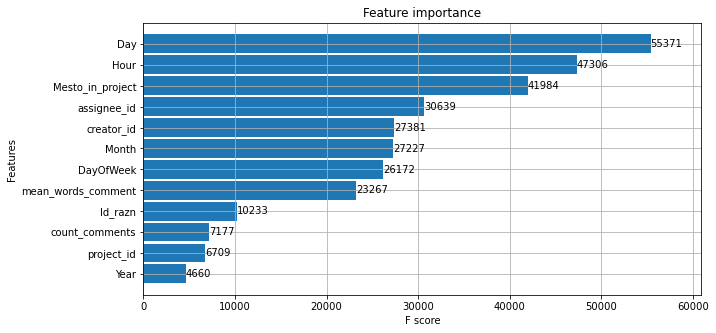

In [23]:
# Важность признаков XGBoost
# 
_ = plot_importance(xgb_estimator, height=0.9)

In [24]:
# Проверка на трейне
predictions = xgb_estimator.predict(train_all[column_names_to_train])

f1_score(train_all['overall_worklogs_binary'], predictions, average='macro', zero_division = 0)

0.9461242852617846

In [25]:
# проверка на тесте
predictions_fin= xgb_estimator.predict(test_all[column_names_to_train])
test_all['overall_worklogs_binary_xgboost']=predictions_fin
test_all['overall_worklogs_binary_xgboost'].value_counts()

1    657
0    413
Name: overall_worklogs_binary_xgboost, dtype: int64

In [28]:
# выбираем поля для нейросети СatBoost по бинарной классификации

X_train=train_all[['project_id', 'assignee_id', 'creator_id', 'summary_to_eng',
        'Year', 'Month', 'Day', 'Hour', 'DayOfWeek', 'Mesto_in_project',
       'Id_razn', 'mean_words_comment', 'count_comments','Text_Summa' ]]
y_train=train_all[['overall_worklogs_binary']]


testnet=test_all[['project_id', 'assignee_id', 'creator_id', 'summary_to_eng',
        'Year', 'Month', 'Day', 'Hour', 'DayOfWeek','Mesto_in_project',
       'Id_razn', 'mean_words_comment', 'count_comments','Text_Summa' ]]

In [29]:
#Обучаем 

pool_train_solution = Pool(X_train, y_train, cat_features = ['project_id', 'assignee_id', 'creator_id',
        'Year', 'Month', 'Day', 'Hour', 'DayOfWeek'], text_features = ['summary_to_eng','Text_Summa'])
pool_test_solution = Pool(testnet,cat_features = ['project_id', 'assignee_id', 'creator_id',
        'Year', 'Month', 'Day', 'Hour', 'DayOfWeek'], text_features = ['summary_to_eng','Text_Summa'])

model_test = CatBoostClassifier(n_estimators=1000, task_type='GPU',depth=12, verbose =True, learning_rate=0.15,random_seed=68)
model_test.fit(pool_train_solution)

0:	learn: 0.6835747	total: 130ms	remaining: 2m 9s
1:	learn: 0.6768837	total: 194ms	remaining: 1m 36s
2:	learn: 0.6717564	total: 299ms	remaining: 1m 39s
3:	learn: 0.6637641	total: 489ms	remaining: 2m 1s
4:	learn: 0.6553812	total: 607ms	remaining: 2m
5:	learn: 0.6514828	total: 723ms	remaining: 1m 59s
6:	learn: 0.6468084	total: 825ms	remaining: 1m 56s
7:	learn: 0.6436808	total: 1.03s	remaining: 2m 8s
8:	learn: 0.6412349	total: 1.11s	remaining: 2m 2s
9:	learn: 0.6382816	total: 1.17s	remaining: 1m 56s
10:	learn: 0.6359710	total: 1.34s	remaining: 2m
11:	learn: 0.6343277	total: 1.42s	remaining: 1m 56s
12:	learn: 0.6321204	total: 1.5s	remaining: 1m 53s
13:	learn: 0.6310574	total: 1.58s	remaining: 1m 51s
14:	learn: 0.6288191	total: 1.69s	remaining: 1m 51s
15:	learn: 0.6261931	total: 1.81s	remaining: 1m 51s
16:	learn: 0.6246628	total: 1.98s	remaining: 1m 54s
17:	learn: 0.6239115	total: 2.08s	remaining: 1m 53s
18:	learn: 0.6227894	total: 2.16s	remaining: 1m 51s
19:	learn: 0.6225671	total: 2.27s	r

In [30]:
# предварительный тест схождения на всем обучающем множестве
y_pred = model_test.predict(X_train)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [31]:
print("Значение метрики f1 на трейне: ", f1_score(train_all['overall_worklogs_binary'], y_pred, average='macro', zero_division = 0))

Значение метрики f1 на трейне:  0.79423155670004


In [32]:
#Получение ответов
y_pred_solution = model_test.predict(pool_test_solution)
y_pred_solution

array([1., 1., 1., ..., 0., 0., 0.])

In [33]:
# Заводим результаты в тест
test_all['overall_worklogs_binary_catboost']=y_pred_solution
test_all['overall_worklogs_binary_catboost'].value_counts()

1.0    651
0.0    419
Name: overall_worklogs_binary_catboost, dtype: int64

In [34]:
# записываем результаты разделения
test_progn1=test_all.loc[(test_all['overall_worklogs_binary_xgboost']==0)&(test_all['overall_worklogs_binary_catboost']==0)]
test_progn1.to_csv('тест до 7200.csv', sep=',', index=None)
test_progn2=test_all.loc[(test_all['overall_worklogs_binary_xgboost']==1)&(test_all['overall_worklogs_binary_catboost']==1)]
test_progn2.to_csv('тест после 7200.csv', sep=',', index=None)

In [35]:
test_progn1

,id,project_id,Id_razn,mean_words_comment,count_comments,assignee_id,creator_id,overall_worklogs,summary_to_eng,Year,...,Day,Hour,DayOfWeek,Mesto_in_project,Text_Summa,overall_worklogs_num,id|Количество,overall_worklogs_binary,overall_worklogs_binary_xgboost,overall_worklogs_binary_catboost
35,721915,1,0,0.0,0,50,39,NaN,UI components: Published date doesn't display ...,3,...,12,13,4,8.612540,UI components: Published date doesn't display ...,NaN,NaN,NaN,0,0.0
39,721911,1,0,0.0,0,19,18,NaN,Move elasticsearch from spot instances to onde...,3,...,12,15,4,8.616352,Move elasticsearch from spot instances to onde...,NaN,NaN,NaN,0,0.0
43,721907,1,0,12.0,1,19,33,NaN,Website: Cast teacherly - close site and put o...,3,...,14,12,6,8.620164,Website: Cast teacherly - close site and put o...,NaN,NaN,NaN,0,0.0
48,721902,1,0,0.0,0,50,33,NaN,Need to fix mark up on mobile resolution,3,...,15,4,0,8.624929,Need to fix mark up on mobile resolution,NaN,NaN,NaN,0,0.0
61,721885,1,0,12.0,1,50,49,NaN,[Markup] Select background modal,3,...,16,8,1,8.641128,[Markup] Select background modal [https://www....,NaN,NaN,NaN,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046,679006,5,0,0.0,0,0,0,NaN,Add open graphs,3,...,23,19,2,1.239946,Add open graphs,NaN,NaN,NaN,0,0.0
1048,679000,5,0,0.0,0,0,0,NaN,Change url structure for blog posts,3,...,23,20,2,1.260054,Change url structure for blog posts,NaN,NaN,NaN,0,0.0
1053,678985,5,0,0.0,0,19,18,NaN,Check for errors when the packer builds at the...,3,...,25,16,4,1.320375,Check for errors when the packer builds at the...,NaN,NaN,NaN,0,0.0
1068,702376,5,0,0.0,0,0,0,NaN,ipphone problem: push & audit result,3,...,4,15,3,10.000000,ipphone problem: push & audit result,NaN,NaN,NaN,0,0.0


In [36]:
test_progn2

,id,project_id,Id_razn,mean_words_comment,count_comments,assignee_id,creator_id,overall_worklogs,summary_to_eng,Year,...,Day,Hour,DayOfWeek,Mesto_in_project,Text_Summa,overall_worklogs_num,id|Количество,overall_worklogs_binary,overall_worklogs_binary_xgboost,overall_worklogs_binary_catboost
0,675975,0,478,62.000000,8,27,26,NaN,Download all mp3 files of calls to disk,3,...,14,9,2,8.884615,Download all mp3 files of calls to disk Resear...,NaN,NaN,NaN,1,1.0
1,675972,0,721,16.500000,4,27,26,NaN,Delete mp3 call files from the server before 0...,3,...,14,9,2,8.903846,Delete mp3 call files from the server before 0...,NaN,NaN,NaN,1,1.0
2,675965,0,0,7.000000,1,22,14,NaN,Remove the tariff selection window and transfe...,3,...,15,4,3,8.961538,Remove the tariff selection window and transfe...,NaN,NaN,NaN,1,1.0
6,675949,0,0,0.000000,0,14,14,NaN,Clear the project backlog of irrelevant tasks,3,...,16,8,4,9.153846,Clear the project backlog of irrelevant tasks,NaN,NaN,NaN,1,1.0
7,675938,0,13,45.500000,2,22,14,NaN,Attach Firebase and GitLab bots to NambaTaxi S...,3,...,19,4,0,9.269231,Attach Firebase and GitLab bots to NambaTaxi S...,NaN,NaN,NaN,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1056,678981,5,20,34.833333,6,0,0,NaN,Logic of countdown clock in Payment Page,3,...,28,15,0,1.340483,Logic of countdown clock in Payment Page [~sar...,NaN,NaN,NaN,1,1.0
1057,688228,5,8,35.333333,3,19,18,NaN,Restoration of the monitoring and log system,3,...,29,15,1,5.623324,Restoration of the monitoring and log system P...,NaN,NaN,NaN,1,1.0
1061,688157,5,0,0.000000,0,19,18,NaN,Deploy EVN and ETL,3,...,7,0,2,5.757373,Deploy EVN and ETL,NaN,NaN,NaN,1,1.0
1063,688147,5,0,41.000000,1,19,18,NaN,Prepare documentation for Magento,3,...,8,3,3,5.770777,Prepare documentation for Magento * Prepare in...,NaN,NaN,NaN,1,1.0
